** 스마트워치 센서 데이터 기반 행동 분류 3일차 **
# --------- 미션5 : 모델 검증 ---------

### (0) 미션 이해하기
   * 그동안 XGBoost 알고리즘을 튜닝해 train 데이터셋에 대한 최고의 행동패턴 분류 모델을 만들었습니다.
   * 이제 test 데이터셋을 사용하여 그동안 만들고 튜닝해온 모델에 데이터를 학습시켜 정확도를 확인 하겠습니다.
   * 미션4에서 튜닝한 XGBoost 알고리즘을 사용해 모델을 생성 하고 train 데이터셋 학습결과와 비교해 보세요.<br>
   

<span style="background-color:#fff5b1"><span style="color:black"><U>※ 미션완수 조건: 튜닝된 XGBoost 모델에 test 데이터셋을 학습시킨 정확도와 train 데이터셋을 학습시킨 정확도를 비교해 보세요.<U></span></span>

<span style="background-color:#fff5b1"><span style="color:red"><U>※ 함수/변수명, 데이터 타입 잘 확인하고 코드를 작성하세요 <U></span></span>

---

### (1) 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러이가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> train_data.csv 불러오기 -> 'subject' 제거 -> result4.csv 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


* test 데이터 불러오기

In [2]:
# 'data' 폴더에서 test_data.csv 파일을 불러와서 data 변수에 할당
# 잘 할당 되었는지 상위 5개행 데이터 확인


data = pd.read_csv('test_data.csv')

# data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거
# 'subject'열이 잘 제거 되었는지 확인

data.drop('subject', axis=True, inplace=True)

data.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,22,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,15,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,22,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,8,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,5,STANDING


* result 데이터 불러오기

In [6]:
# 모델별 정확도를 비교 할 수 있도록 결과 저장 파일 호출 
# result 변수에 'data' 폴더에서 /result4.csv 파일을 불러와서 할당
# 잘 불러와 졌는지 확인

result = pd.read_csv('result4.csv')
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top_model,0.992635,0.993060


### (2) Feature Selection
* test 데이터를 사용하여 모델을 생성하고 Feature Selection을 적용하여 중요도 상위 feature로 학습시켜 정확도를 높여 보세요.


	- 실습순서: 중요도 데이터프레임 생성-> 데이터 분할/가공 -> Feature Selection(중요도 상위 Features) -> 최적의 Feature Selection 찾기 -> 모델링 -> 결과 저장 

In [7]:
# x, y 데이터 나누기 (target = 'Activity')

y = data['Activity']
x = data.drop('Activity', axis=1)
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.7,random_state=2023)



In [8]:
# XGBoost 는 문자형 데이터로 학습할 수 없습니다. 
# y_map 변수를 생성해서 target 데이터(y)를 숫자형 형태로 치환하여 할당
# 데이터 치환 함수: map
# 치환 데이터: 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5

map_dATA={ 'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5}

y_map=y.map(map_dATA)

In [9]:
# x,y_map를 사용하여 학습 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
# random_state=2023


x_train,x_val,y_map_train,y_map_val=train_test_split(x,y_map,test_size=0.3,random_state=2023)


* feature 별 중요도 도출을 위한 모델링

In [10]:
# 베스트 파라미터를 적용한 xgb 모델 선언(초기화), 학습, 예측
# AI모델 변수명: xgb_hpt_model 예측결과 변수명: xgb_hpt_pred
# random_state=2023

xgb_hpt_model = XGBClassifier(random_state=2023, max_depth = 3 , learning_rate = 0.3)

# 학습하기
xgb_hpt_model.fit(x_train, y_map_train)

# 예측하기
xgb_hpt_pred = xgb_hpt_model.predict(x_val)


In [11]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_map_val,xgb_hpt_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_map_val,xgb_hpt_pred))
print('\n classification_report: \n',classification_report(y_map_val,xgb_hpt_pred))

accuracy_score:  0.9705882352941176

 confusion_matrix: 
 [[82  4  0  0  0  0]
 [ 6 66  0  0  0  0]
 [ 0  0 84  0  0  0]
 [ 0  0  0 71  0  2]
 [ 0  0  0  0 67  0]
 [ 0  0  0  0  1 59]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        86
           1       0.94      0.92      0.93        72
           2       1.00      1.00      1.00        84
           3       1.00      0.97      0.99        73
           4       0.99      1.00      0.99        67
           5       0.97      0.98      0.98        60

    accuracy                           0.97       442
   macro avg       0.97      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442



In [13]:
# result 변수에 result 변수(데이터프레임) 마지막에 모델 평가 결과 추가 
# 할당할 정보는 데이터명('test'), 모델명('xgb_hpt'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인
result.loc[10] = ['test', 'xgb_hpt', accuracy_score(y_map_val,xgb_hpt_pred), f1_score(y_map_val,xgb_hpt_pred,average='macro')]
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top_model,0.992635,0.993060
10,test,xgb_hpt,0.970588,0.971003


* 변수별 중요도 추출

In [14]:
# importance_sort 데이터프레임 변수 생성 초기화

importance_data = pd.DataFrame()

In [16]:
# importance_sort['feature_name'] 열에 모델링에 사용한 x 데이터프레임의 컬럼명을 할당

importance_data['feature_name'] = x.columns


In [17]:
# importance_sort['feature_importance'] 열에 앞에서 사용한 xgb_hpt_model 모델의 feature_importances 를 할당
# 참고함수: feature_importances_

importance_data['feature_importance'] = xgb_hpt_model.feature_importances_
importance_data

,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000844
1,tBodyAcc-mean()-Y,0.000108
2,tBodyAcc-mean()-Z,0.000440
3,tBodyAcc-std()-X,0.001423
4,tBodyAcc-std()-Y,0.000894
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",0.001842
557,"angle(tBodyGyroJerkMean,gravityMean)",0.000000
558,"angle(X,gravityMean)",0.000145
559,"angle(Y,gravityMean)",0.002215


,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000844
1,tBodyAcc-mean()-Y,0.000108
2,tBodyAcc-mean()-Z,0.000440
3,tBodyAcc-std()-X,0.001423
4,tBodyAcc-std()-Y,0.000894
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",0.001842
557,"angle(tBodyGyroJerkMean,gravityMean)",0.000000
558,"angle(X,gravityMean)",0.000145
559,"angle(Y,gravityMean)",0.002215


In [19]:
importance_sort = importance_data.sort_values(by='feature_importance', ascending=False)
importance_sort

,feature_name,feature_importance
166,tBodyGyroJerk-mad()-X,0.138832
516,fBodyBodyAccJerkMag-std(),0.104186
9,tBodyAcc-max()-X,0.040473
40,tGravityAcc-mean()-X,0.037269
296,fBodyAcc-skewness()-X,0.036166
...,...,...
217,tGravityAccMag-min(),0.000000
216,tGravityAccMag-max(),0.000000
383,"fBodyAccJerk-bandsEnergy()-17,24",0.000000
384,"fBodyAccJerk-bandsEnergy()-25,32",0.000000


In [20]:
# feature_importance 내림차순 정렬 때문에 엉킨 인덱스 재설정
# 참고함수: reset_index
# 파라미터: drop=True, inplace=True
# 제대로 정렬 되었는지 데이터 프레임에 확인

importance_sort.reset_index(inplace=True, drop=True)
importance_sort

,feature_name,feature_importance
0,tBodyGyroJerk-mad()-X,0.138832
1,fBodyBodyAccJerkMag-std(),0.104186
2,tBodyAcc-max()-X,0.040473
3,tGravityAcc-mean()-X,0.037269
4,fBodyAcc-skewness()-X,0.036166
...,...,...
556,tGravityAccMag-min(),0.000000
557,tGravityAccMag-max(),0.000000
558,"fBodyAccJerk-bandsEnergy()-17,24",0.000000
559,"fBodyAccJerk-bandsEnergy()-25,32",0.000000


* Feature Selection 을 반복적으로 적용해 최고 정확도의 중요 feature 개수 학습 결과 선별

In [24]:
importance_100 = importance_sort['feature_name'][:100]
importance_100

0            tBodyGyroJerk-mad()-X
1        fBodyBodyAccJerkMag-std()
2                 tBodyAcc-max()-X
3             tGravityAcc-mean()-X
4            fBodyAcc-skewness()-X
                  ...             
95         tBodyGyroMag-arCoeff()2
96    fBodyAcc-bandsEnergy()-41,48
97         tBodyGyro-arCoeff()-X,2
98               tBodyGyro-iqr()-X
99      fBodyBodyGyroJerkMag-max()
Name: feature_name, Length: 100, dtype: object

In [25]:

x_train_100 = x_train[importance_100]
x_val_100 = x_val[importance_100]

In [34]:

acc = pd.DataFrame(columns=['accuracy_score'])

for i in range(130):

    importance_n = importance_sort['feature_name'][:i+1]

    x_train_n = x_train[importance_n]
    x_val_n = x_val[importance_n]

    xgb_n_model = XGBClassifier(learning_rate=0.3, max_depth=3, random_state=2023)
    xgb_n_model.fit(x_train_n, y_map_train)
    xgb_n_pred = xgb_n_model.predict(x_val_n)
    
    acc.loc[i] = accuracy_score(y_map_val,xgb_n_pred)
    print(acc.loc[i])

acc

accuracy_score    0.432127
Name: 0, dtype: float64
accuracy_score    0.556561
Name: 1, dtype: float64
accuracy_score    0.680995
Name: 2, dtype: float64
accuracy_score    0.848416
Name: 3, dtype: float64
accuracy_score    0.848416
Name: 4, dtype: float64
accuracy_score    0.857466
Name: 5, dtype: float64
accuracy_score    0.859729
Name: 6, dtype: float64
accuracy_score    0.893665
Name: 7, dtype: float64
accuracy_score    0.904977
Name: 8, dtype: float64
accuracy_score    0.902715
Name: 9, dtype: float64
accuracy_score    0.909502
Name: 10, dtype: float64
accuracy_score    0.938914
Name: 11, dtype: float64
accuracy_score    0.934389
Name: 12, dtype: float64
accuracy_score    0.945701
Name: 13, dtype: float64
accuracy_score    0.941176
Name: 14, dtype: float64
accuracy_score    0.945701
Name: 15, dtype: float64
accuracy_score    0.952489
Name: 16, dtype: float64
accuracy_score    0.943439
Name: 17, dtype: float64
accuracy_score    0.941176
Name: 18, dtype: float64
accuracy_score    0.94

,accuracy_score
0,0.432127
1,0.556561
2,0.680995
3,0.848416
4,0.848416
...,...
125,0.970588
126,0.968326
127,0.970588
128,0.968326


In [ ]:
#강사코드


In [17]:
# acc 데이터 프레임을 생성 및 초기화(컬럼 지정: columns=['accuracy_score'])
# for 문을 사용해 중요도 상위 feature 1개 모델링부터 상위 feature 100개  모델링까지 순차적 모델링 실행 후 각 accuracy_score 결과를 acc 변수에 누적
# 전체 feature는 561개 이지만, 학습에 130개면 충분(약 10분 소요)
# for 매 회 마다 결과 출력(양식: print(acc.loc[i])


accuracy_score    0.432127
Name: 0, dtype: float64
accuracy_score    0.556561
Name: 1, dtype: float64
accuracy_score    0.680995
Name: 2, dtype: float64
accuracy_score    0.848416
Name: 3, dtype: float64
accuracy_score    0.848416
Name: 4, dtype: float64
accuracy_score    0.857466
Name: 5, dtype: float64
accuracy_score    0.859729
Name: 6, dtype: float64
accuracy_score    0.893665
Name: 7, dtype: float64
accuracy_score    0.904977
Name: 8, dtype: float64
accuracy_score    0.902715
Name: 9, dtype: float64
accuracy_score    0.909502
Name: 10, dtype: float64
accuracy_score    0.938914
Name: 11, dtype: float64
accuracy_score    0.934389
Name: 12, dtype: float64
accuracy_score    0.945701
Name: 13, dtype: float64
accuracy_score    0.941176
Name: 14, dtype: float64
accuracy_score    0.945701
Name: 15, dtype: float64
accuracy_score    0.952489
Name: 16, dtype: float64
accuracy_score    0.943439
Name: 17, dtype: float64
accuracy_score    0.941176
Name: 18, dtype: float64
accuracy_score    0.94

,accuracy_score
0,0.432127
1,0.556561
2,0.680995
3,0.848416
4,0.848416
...,...
125,0.970588
126,0.968326
127,0.970588
128,0.968326


<Figure size 1000x800 with 0 Axes>

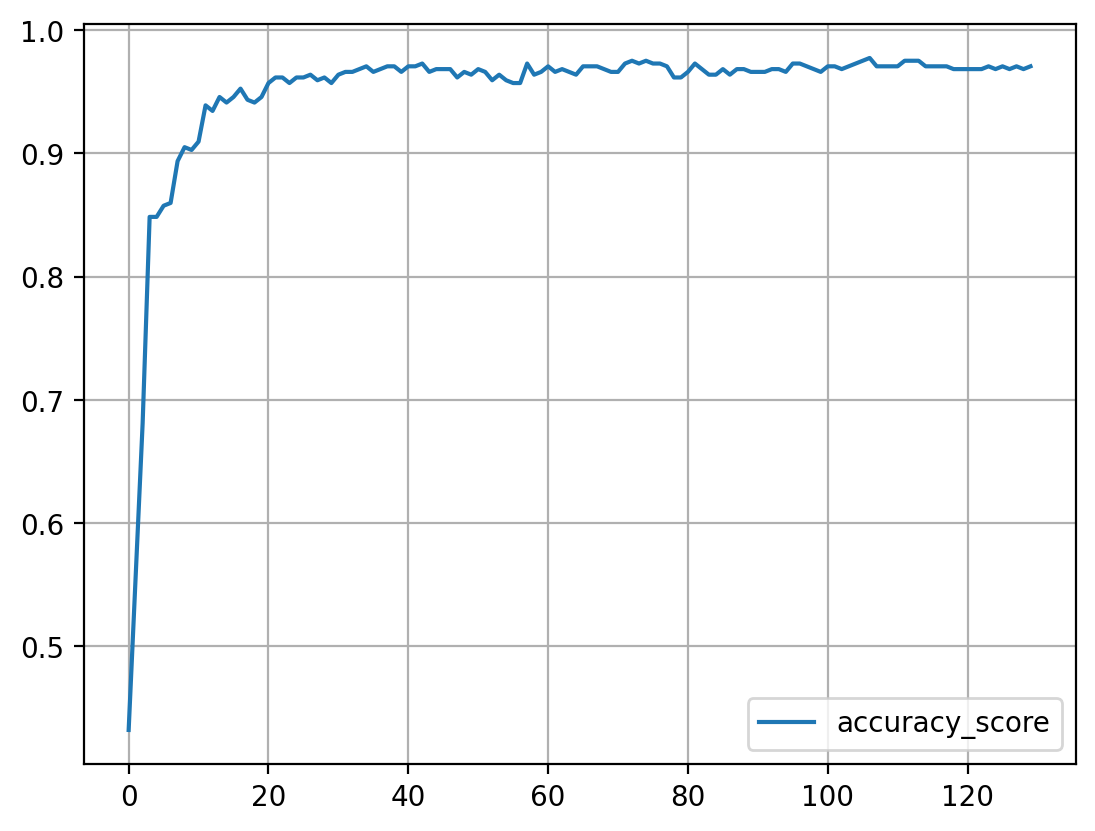

In [35]:
plt.figure(figsize=(10,8))
acc.plot()
plt.grid()
plt.show()

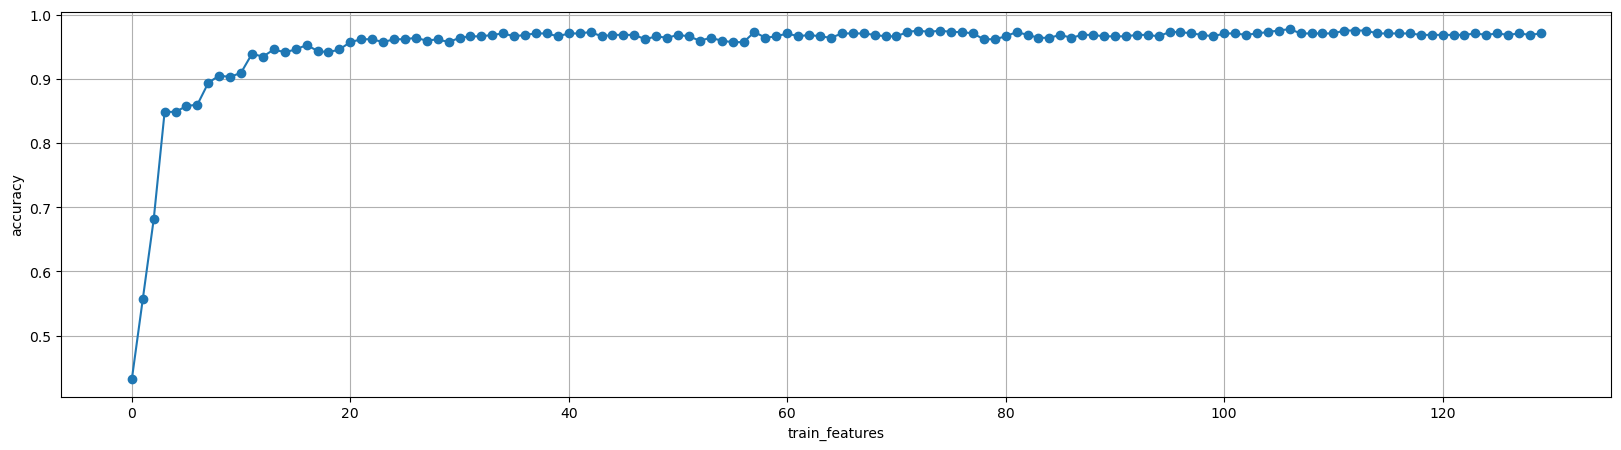

In [18]:
# accuracy_score 누적한 acc 변수 시각화
## 참고 함수: plt.plot




* 정확도 최고의 학습 Feature 개수 찾기

In [36]:
# acc 변수를 accuracy_score 기준 내림차순으로 정렬(인덱스 재설정X)
# accuracy_score 값이 가장 높을때의 인덱스명이 학습된 상위 feature 개수를 뜻함
acc = acc.sort_values(by='accuracy_score', ascending=False)
acc

,accuracy_score
106,0.977376
111,0.975113
105,0.975113
72,0.975113
113,0.975113
...,...
4,0.848416
3,0.848416
2,0.680995
1,0.556561


In [19]:
# acc 변수를 accuracy_score 기준 내림차순으로 정렬(인덱스 재설정X)
# accuracy_score 값이 가장 높을때의 인덱스명이 학습된 상위 feature 개수를 뜻함

,accuracy_score
106,0.977376
111,0.975113
105,0.975113
72,0.975113
113,0.975113
...,...
4,0.848416
3,0.848416
2,0.680995
1,0.556561


In [38]:
importance_top = importance_sort['feature_name'][:acc.index[0]+1]
importance_top

0                tBodyGyroJerk-mad()-X
1            fBodyBodyAccJerkMag-std()
2                     tBodyAcc-max()-X
3                 tGravityAcc-mean()-X
4                fBodyAcc-skewness()-X
                    ...               
102              tBodyGyroJerk-iqr()-Z
103        tBodyGyroJerk-arCoeff()-Y,1
104    fBodyGyro-bandsEnergy()-17,24.2
105        tBodyGyroJerk-arCoeff()-X,1
106      fBodyAcc-bandsEnergy()-9,16.2
Name: feature_name, Length: 107, dtype: object

In [20]:
# importance_top 변수에 acc 에서 확인한 상위 feature 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 할당
# 참고: 슬라이싱 할때 [:1] -> index 0 까지 짤림, [:100] -> index 99 까지 짤림, 정확도 최고치 인덱스 값 +1 해서 슬라이싱 할것

importance_top = importance_sort['feature_name'][:acc.index[0]+1]
importance_top

0                tBodyGyroJerk-mad()-X
1            fBodyBodyAccJerkMag-std()
2                     tBodyAcc-max()-X
3                 tGravityAcc-mean()-X
4                fBodyAcc-skewness()-X
                    ...               
102              tBodyGyroJerk-iqr()-Z
103        tBodyGyroJerk-arCoeff()-Y,1
104    fBodyGyro-bandsEnergy()-17,24.2
105        tBodyGyroJerk-arCoeff()-X,1
106      fBodyAcc-bandsEnergy()-9,16.2
Name: feature_name, Length: 107, dtype: object

In [39]:
# 훈련 데이터 생성
# x_train_top 변수에 x_train을 중요 feature 만클 슬라이싱 한 x_train[importance_top] 할당
# x_val_top 변수에 x_val을 중요 feature 만클 슬라이싱 한 x_val[importance_top] 할당


x_train_top = x_train[importance_top]
x_val_top = x_val[importance_top]


In [40]:


# XGBClassifier 모델 초기화,학습,예측
# AI모델 변수명: xgb_top_model , 예측결과 변수명: xgb_top_pred
# random_state=2023

xgb_top_model = XGBClassifier(random_state=2023, max_depth = 3 , learning_rate = 0.3)

# 학습하기
xgb_top_model.fit(x_train_top, y_map_train)

# 예측하기
xgb_top_pred = xgb_top_model.predict(x_val_top)




In [41]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_map_val,xgb_top_pred))
print('\n confusion_matrix: \n',confusion_matrix(y_map_val,xgb_top_pred))
print('\n classification_report: \n',classification_report(y_map_val,xgb_top_pred))


accuracy_score:  0.9773755656108597

 confusion_matrix: 
 [[83  3  0  0  0  0]
 [ 4 68  0  0  0  0]
 [ 0  0 84  0  0  0]
 [ 0  0  0 71  0  2]
 [ 0  0  0  0 67  0]
 [ 0  0  0  0  1 59]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        86
           1       0.96      0.94      0.95        72
           2       1.00      1.00      1.00        84
           3       1.00      0.97      0.99        73
           4       0.99      1.00      0.99        67
           5       0.97      0.98      0.98        60

    accuracy                           0.98       442
   macro avg       0.98      0.98      0.98       442
weighted avg       0.98      0.98      0.98       442



In [23]:
#강사




accuracy_score:  0.9773755656108597

 confusion_matrix: 
 [[83  3  0  0  0  0]
 [ 4 68  0  0  0  0]
 [ 0  0 84  0  0  0]
 [ 0  0  0 71  0  2]
 [ 0  0  0  0 67  0]
 [ 0  0  0  0  1 59]]

 classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        86
           1       0.96      0.94      0.95        72
           2       1.00      1.00      1.00        84
           3       1.00      0.97      0.99        73
           4       0.99      1.00      0.99        67
           5       0.97      0.98      0.98        60

    accuracy                           0.98       442
   macro avg       0.98      0.98      0.98       442
weighted avg       0.98      0.98      0.98       442



In [43]:
result.loc[11] = ['train', 'xgb_top_model', accuracy_score(y_map_val,xgb_top_pred), f1_score(y_map_val,xgb_top_pred,average='macro')]
result

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top_model,0.992635,0.993060
10,test,xgb_hpt,0.970588,0.971003


In [46]:
# result 변수에 result 데이터프레임 마지막에 모델 평가 결과 추가 (append 함수는 inplace 파라미터가 없음)
# 할당할 정보는 데이터명('test'), 모델명('xgb_top'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

# result 변수에 result 데이터프레임 마지막에 모델 평가 결과 추가 (append 함수는 inplace 파라미터가 없음)
# 할당할 정보는 데이터명('train'), 모델명('xgb_top'), 'accuracy_score', 'f1_score' 예측 결과 할당
# 정확히 구성되었나 확인

result.loc[11] = ['test', 'xgb_top_model', accuracy_score(y_map_val,xgb_top_pred), f1_score(y_map_val,xgb_top_pred,average='macro')]


### (3) 결과 저장 및 시각화

In [48]:
# 인덱스 미포함 result 변수를 result5.csv 파일로 저장
# 저장경로: ./data
# 파일명: result5.csv

result.to_csv('result5.csv', index=False)


In [49]:
pd.read_csv('result5.csv')

,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top_model,0.992635,0.993060
9,test,xgb_hpt,0.970588,0.971003


In [50]:
# 잘 저장 되었는지 확인
pd.read_csv('result5.csv')



,data,model_name,accuracy_score,f1_score
0,train,svc,0.968839,0.971715
1,train,KNN,0.954674,0.958345
2,train,LR,0.983003,0.984583
3,train,GBM,0.981870,0.983141
4,train,xgb,0.990368,0.991052
5,train,xgb_hpt,0.991501,0.992355
6,train,xgb95_hpt,0.992068,0.992371
7,train,xgb50_hpt,0.988669,0.988601
8,train,xgb_top_model,0.992635,0.993060
9,test,xgb_hpt,0.970588,0.971003


*  model_name 별 accuracy_score, f1_score 시각화(수직 그래프) 

In [27]:
# result_comp 변수에 result 데이터프레임의 data, model_name을 컴럼으로 지정 후 할당
# 참고함수: set_index
# 지정 인덱스: ['data','model_name']

result_comp = result.set_index(['data','model_name'])
result_comp


accuracy_score  f1_score
data  model_name                          
train svc               0.968839  0.971715
      knn               0.954674  0.958345
      lr                0.984703  0.986111
      gb                0.981870  0.983141
      xgb               0.990368  0.991052
      xgb_hpt           0.991501  0.992355
      xgb95_hpt         0.992068  0.992371
      xgb50_hpt         0.988669  0.988601
      xgb_top           0.992635  0.993060
test  xgb_hpt           0.970588  0.971003
      xgb_top           0.977376  0.977416

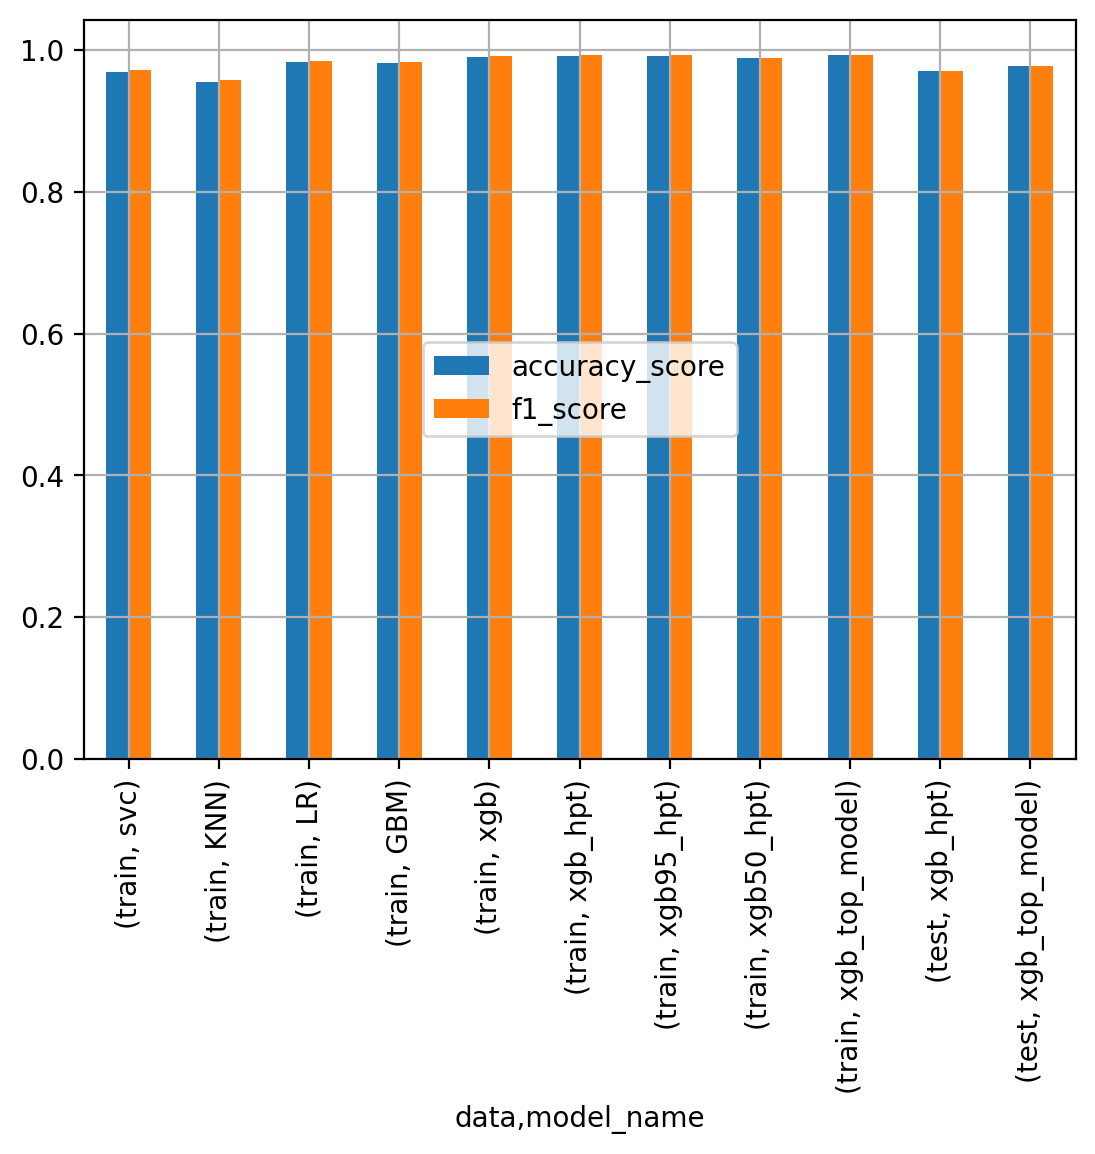

In [53]:
# pandas의 plot 함수을 사용하여 AI모델 별 accuracy_score, f1_score 수직 그래프 시각화
# grid 추가
# legend 위치 center

result_comp.plot(kind='bar')
plt.grid()
plt.legend(loc='center')
plt.show()



---
---